# Experiment on stochastic policies

![The MDP](figures/stochasticity-optimality.png)

In [1]:
from utils import *
from training import *
from policies import *
from envs import *
from electrical_utils import *
import seaborn as sns
import itertools

In [2]:
def evaluate_batch_size(size):
  policy =NanoMLP()
  optimizer = optim.Adam(policy.parameters(), lr=0.01)
  L,Lu,Lx,Lcpt,_ = train(policy, optimizer, env=NanoWorld(),num_episodes=100, batch_size= size, draw_phi=False,draw_policy=False,adaptive_baseline=False,random_start=False,log_interval=1, changing_alpha=False, w=wp_counterexample,return_best=False)
  return policy(torch.tensor([0.]))[0].item()

In [3]:
n_tries = 10 #Change this to 100 to get the plot from the thesis (takes a lot of time)

In [4]:
X = []
Y = []
for size,_ in tqdm(itertools.product([10,50,100,200,300,400,500,600,700,800,900,1000],range(n_tries))):
  X.append(size)
  Y.append(evaluate_batch_size(size))

0it [00:00, ?it/s]C:\Users\iclr25\Desktop\code_restructure\CPT-RL\policies.py:85: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)
120it [1:16:19, 38.16s/it] 


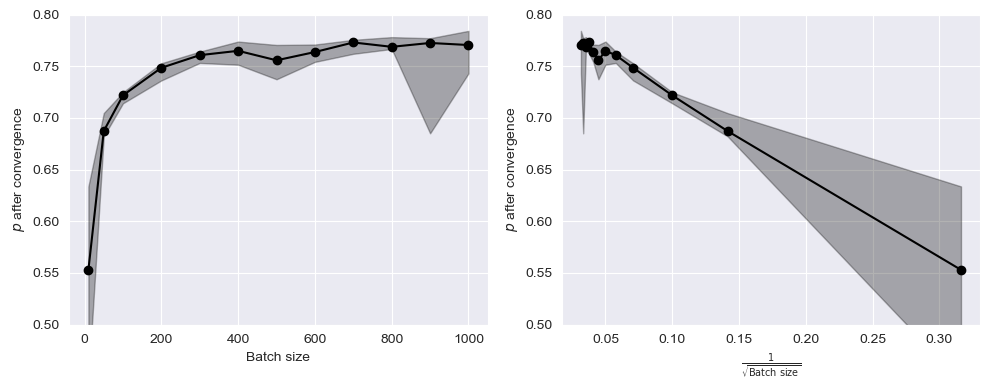

In [5]:
XX = sorted(list(set(X)))
runs = []
for i in range(n_tries):
    run = []
    for j in range(12):
        run.append(Y[n_tries*j+i])
    runs.append(run)
    
median_performance = np.median(runs, axis=0)
first_quartile = np.percentile(runs, 25, axis=0)
third_quartile = np.percentile(runs, 75, axis=0)

steps = XX 
steps_sqrt_inv = [elt**(-0.5) for elt in XX] 


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


ax1.scatter(steps, median_performance, color='black')
ax1.plot(steps, median_performance, color='black')
ax1.fill_between(steps, first_quartile, third_quartile, color='black', alpha=0.3)
ax1.set_xlabel('Batch size')
ax1.set_ylabel('$p$ after convergence')

ax1.set_ylim(0.5, 0.8)


ax2.scatter(steps_sqrt_inv, median_performance, color='black')
ax2.plot(steps_sqrt_inv, median_performance, color='black')
ax2.fill_between(steps_sqrt_inv, first_quartile, third_quartile, color='black', alpha=0.3)
ax2.set_xlabel("$\\frac{1}{\\sqrt{\\text{Batch size}}}$")
ax2.set_ylabel('$p$ after convergence')


ax2.set_ylim(0.5, 0.8)


plt.tight_layout()
plt.show()